In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
bench_data = Table.read('/tmp/benchmark.csv')
repeat = 100

In [3]:
mean = bench_data.group_by(['Image', 'Kernel', 'Implementation']).groups.aggregate(np.mean)

In [4]:
mean['Implementation'] = [i.split('<')[0] for i in mean['Implementation']]

<IPython.core.display.Javascript object>


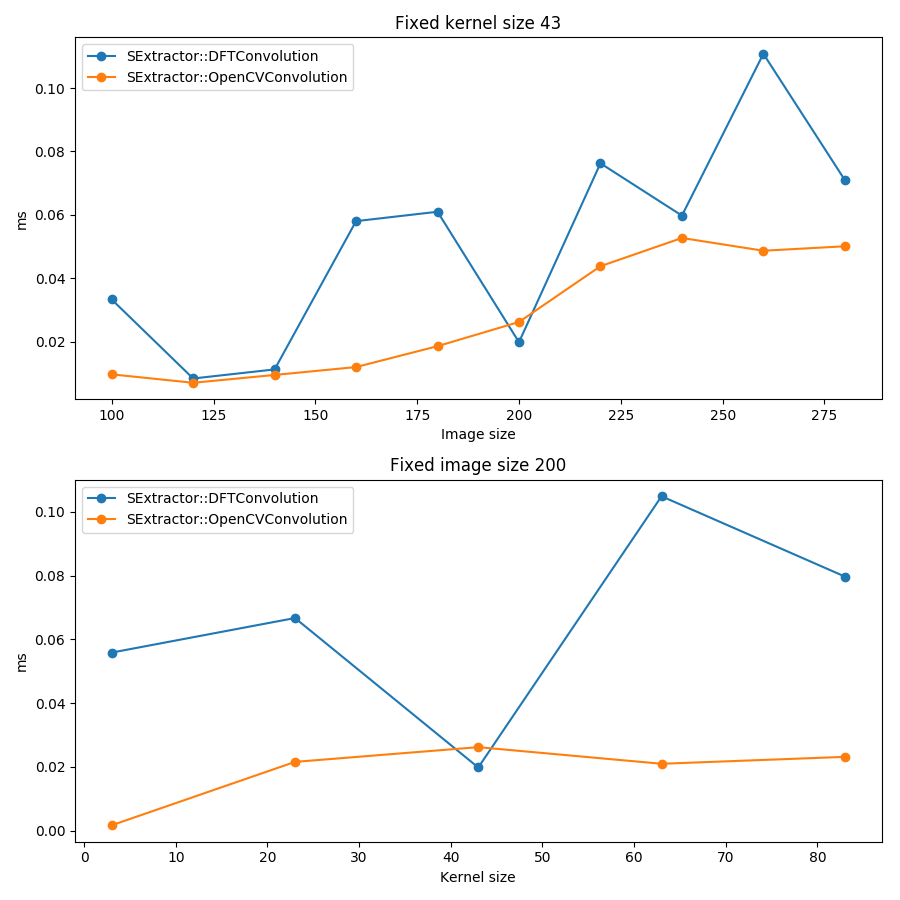

In [5]:
ref_img_size = 200
ref_kernel_size = 43

by_img_size = mean[mean['Image'] == ref_img_size]
by_kernel_size = mean[mean['Kernel'] == ref_kernel_size]

_, axs = plt.subplots(2, 1, figsize=(9, 9))

for i in [i for i in np.unique(mean['Implementation']) if i != 'SExtractor::DirectConvolution']:
    krn_impl_subset = by_kernel_size[by_kernel_size['Implementation'] == i]
    img_impl_subset = by_img_size[by_img_size['Implementation'] == i]
        
    axs[0].plot(krn_impl_subset['Image'], krn_impl_subset['Time']/repeat/1e6, '-o', label=i)
    axs[1].plot(img_impl_subset['Kernel'], img_impl_subset['Time']/repeat/1e6, '-o', label=i)
    
axs[0].legend(); axs[1].legend()
axs[0].set_xlabel('Image size'); axs[1].set_xlabel('Kernel size')
axs[0].set_ylabel('ms'); axs[1].set_ylabel('ms')

axs[0].set_title(f'Fixed kernel size {ref_kernel_size}')
axs[1].set_title(f'Fixed image size {ref_img_size}')

_ = plt.tight_layout()